# Tiền xử lý dữ liệu (Code của nhóm)

         Date  Buy Price (x1000đ/lượng)  Sell Price (x1000đ/lượng)
0  2009-08-01                     21.13                      21.19
1  2009-08-02                     21.13                      21.19
2  2009-08-03                     21.13                      21.19
3  2009-08-04                     21.13                      21.19
4  2009-08-05                     21.13                      21.19
            Date  Buy Price (x1000đ/lượng)  Sell Price (x1000đ/lượng)
5560  2024-12-28                      82.8                       85.3
5561  2024-12-29                      82.8                       85.3
5562  2024-12-30                      82.8                       85.3
5563  2024-12-31                      82.8                       85.3
5564  2025-01-01                      82.8                       85.3

Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5565 entries, 0 to 5564
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtyp

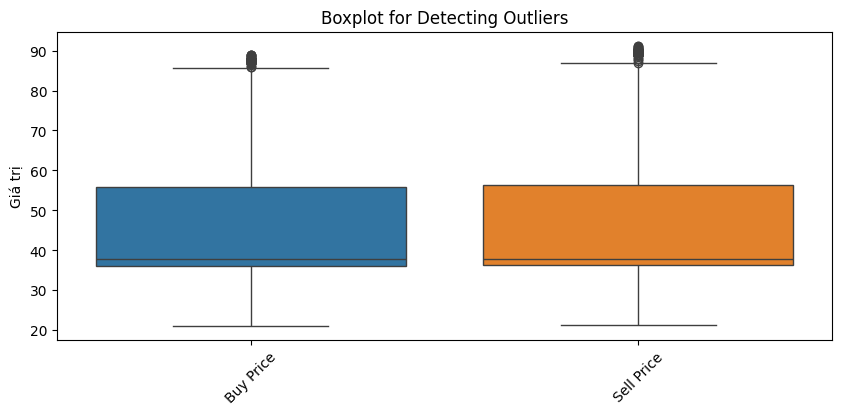

0
0
Date          datetime64[ns]
Buy Price            float64
Sell Price           float64
dtype: object
Kích thước dữ liệu trước khi xử lý outliers: (5565, 3)
Kích thước dữ liệu sau khi xử lý outliers: (5502, 3)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats

# Đọc dữ liệu
df_clean = pd.read_csv("gold_prices.csv")

# Xem 5 dòng đầu và cuối
print(df_clean.head())
print(df_clean.tail(5))
print("\nThông tin dữ liệu:")
df_clean.info()
print("\nThống kê mô tả dữ liệu:")
print(df_clean.describe())
#Đổi tên cột
df_clean.rename(columns={
    'Buy Price (x1000đ/lượng)': 'Buy Price',
    'Sell Price (x1000đ/lượng)': 'Sell Price'
}, inplace=True)
# Kiểm tra giá trị thiếu
missing_values = df_clean.isnull().sum()
print("Số lượng giá trị thiếu trong mỗi cột:")
print(missing_values)


# Lọc các cột số liệu
numeric_columns = df_clean.select_dtypes(include=['float64', 'int64']).columns

# Vẽ boxplot
plt.figure(figsize=(10, 4))
sns.boxplot(data=df_clean[numeric_columns])
plt.title('Boxplot for Detecting Outliers')
plt.xticks(rotation=45)
plt.ylabel('Giá trị')
plt.show()
# Vì kiểu dữ liệu cột Date đang ở dạng object
# -> Chuyển kiểu dữ liệu cột Date sang datetime
df_clean['Date'] = pd.to_datetime(df_clean['Date'])
df_clean.dtypes
# Đảm bảo dữ liệu được sắp xếp theo thời gian
df_clean = df_clean.sort_values(by='Date')
# Vì kiểu dữ liệu cột Date đang ở dạng object
# -> Chuyển kiểu dữ liệu cột Date sang datetime
df_clean['Date'] = pd.to_datetime(df_clean['Date'])
df_clean.dtypes
# Đảm bảo dữ liệu được sắp xếp theo thời gian
df_clean = df_clean.sort_values(by='Date')
# Kiểm tra Buy Price  và Sell Price có giá trị âm không
dem_BuyPrice_am = df_clean[df_clean['Buy Price'] < 0].shape[0]
print(dem_BuyPrice_am)

dem_SellPrice_am = df_clean[df_clean['Sell Price'] < 0].shape[0]
print(dem_SellPrice_am)
#Xử lý bằng cách: Thay thế giá trị âm bằng giá trị trung bình của cột
mean_buy = df_clean[df_clean['Buy Price'] >= 0]['Buy Price'].mean()
mean_sell = df_clean[df_clean['Sell Price'] >= 0]['Sell Price'].mean()
df_clean['Buy Price'] = df_clean['Buy Price'].apply(lambda x: mean_buy if x < 0 else x)
df_clean['Sell Price'] = df_clean['Sell Price'].apply(lambda x: mean_sell if x < 0 else x)


print(df_clean.dtypes)

# In kích thước ban đầu
print(f"Kích thước dữ liệu trước khi xử lý outliers: {df_clean.shape}")

# Copy dataframe
df_clean_clean = df_clean.copy()

# Chọn các cột số cần xử lý
cols = ['Buy Price', 'Sell Price']

for col in cols:
    Q1 = df_clean_clean['Buy Price'].quantile(0.25)
    Q3 = df_clean_clean['Sell Price'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_clean_clean = df_clean_clean[(df_clean_clean[col] >= lower_bound) & (df_clean_clean[col] <= upper_bound)]

# In kích thước sau xử lý
print(f"Kích thước dữ liệu sau khi xử lý outliers: {df_clean_clean.shape}")
df_clean_clean.to_csv("gold_prices_clean.csv", index=False)

# Đánh giá dữ liệu trước khi thực hiện thuật toán


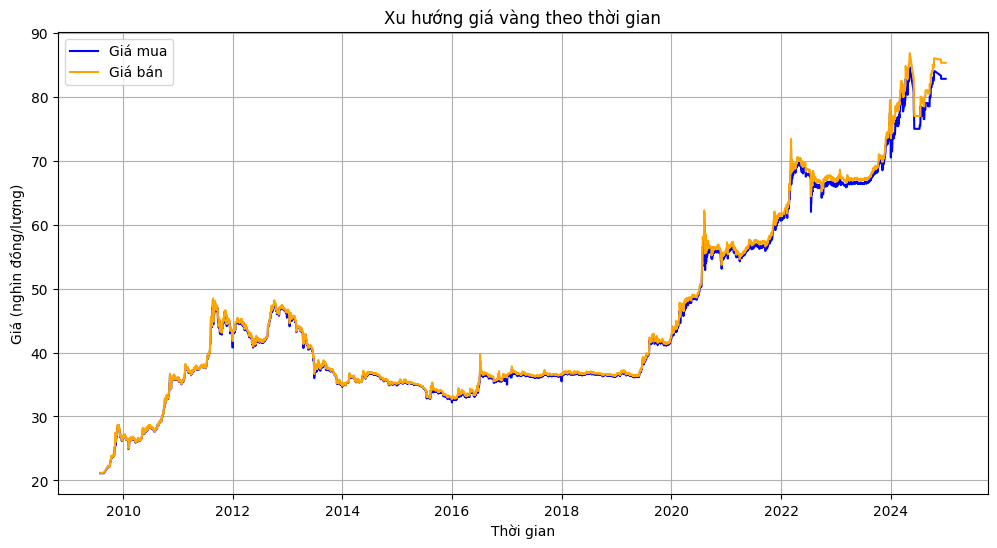

In [8]:
#Biểu đồ đường: Xu hướng giá theo thời gian (Rolling Statistics Plot)

import matplotlib.pyplot as plt

# Chuyển đổi cột 'Date' sang kiểu datetime
df_clean['Date'] = pd.to_datetime(df_clean['Date'])

# Thiết lập trục thời gian làm chỉ số
df_clean.set_index('Date', inplace=True)

# Vẽ biểu đồ xu hướng giá mua và bán theo thời gian
plt.figure(figsize=(12, 6))
plt.plot(df_clean.index, df_clean['Buy Price'], label='Giá mua', color='blue')
plt.plot(df_clean.index, df_clean['Sell Price'], label='Giá bán', color='orange')
plt.title('Xu hướng giá vàng theo thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Giá (nghìn đồng/lượng)')
plt.legend()
plt.grid(True)
plt.show()


# Time-series forecasting with regression vs (MAD + SSE)

In [2]:
# Import library
import pandas as pd
df_clean=pd.read_csv('gold_prices_clean.csv')
df_clean

,Date,Buy Price,Sell Price
0,2009-08-01,21.13,21.19
1,2009-08-02,21.13,21.19
2,2009-08-03,21.13,21.19
3,2009-08-04,21.13,21.19
4,2009-08-05,21.13,21.19
...,...,...,...
5497,2024-12-28,82.80,85.30
5498,2024-12-29,82.80,85.30
5499,2024-12-30,82.80,85.30
5500,2024-12-31,82.80,85.30


In [3]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5502 entries, 0 to 5501
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        5502 non-null   object 
 1   Buy Price   5502 non-null   float64
 2   Sell Price  5502 non-null   float64
dtypes: float64(2), object(1)
memory usage: 129.1+ KB


In [4]:
# Vì cột 'Date' đang ở dạng object -> Chuyển kiểu dữ liệu cột 'Date' sang datetime
import pandas as pd
# Chuyển đổi cột 'Date' sang kiểu dữ liệu datetime
df_clean['Date'] = pd.to_datetime(df_clean['Date'])

# Hiển thị DataFrame
df_clean

,Date,Buy Price,Sell Price
0,2009-08-01,21.13,21.19
1,2009-08-02,21.13,21.19
2,2009-08-03,21.13,21.19
3,2009-08-04,21.13,21.19
4,2009-08-05,21.13,21.19
...,...,...,...
5497,2024-12-28,82.80,85.30
5498,2024-12-29,82.80,85.30
5499,2024-12-30,82.80,85.30
5500,2024-12-31,82.80,85.30


In [5]:
import numpy as np
df_clean['Time'] = np.arange(len(df_clean.index))
df_clean.head()

,Date,Buy Price,Sell Price,Time
0,2009-08-01,21.13,21.19,0
1,2009-08-02,21.13,21.19,1
2,2009-08-03,21.13,21.19,2
3,2009-08-04,21.13,21.19,3
4,2009-08-05,21.13,21.19,4


MAD (Buy Price): 7.321104827094697
SSE (Buy Price): 409301.346200365


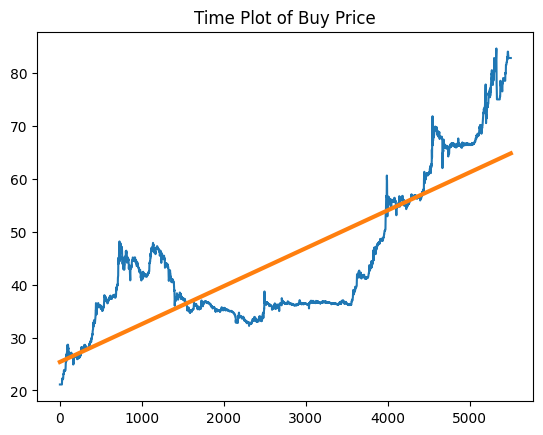

In [6]:
from sklearn.linear_model import LinearRegression
# Xác định các giá trị dự đoán
# Dữ liệu huấn luyện
X = df_clean.loc[:, ['Time']]  # đặc trưng
y = df_clean.loc[:, 'Buy Price']  # mục tiêu

# Huấn luyện mô hình
model = LinearRegression()
model.fit(X, y)

# Lưu các giá trị dự đoán dưới dạng chuỗi thời gian với cùng chỉ số thời gian như dữ liệu huấn luyện
y_pred = pd.Series(model.predict(X), index=X.index)

# Vẽ biểu đồ cho y và y dự đoán
ax = y.plot()
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Buy Price');


# Tính MAD (Mean Absolute Deviation - Độ lệch tuyệt đối trung bình)
mad = (y - y_pred).abs().mean()

# Tính SSE (Sum of Squared Errors - Tổng bình phương sai số)
sse = ((y - y_pred) ** 2).sum()

print(f"MAD (Buy Price): {mad}")
print(f"SSE (Buy Price): {sse}")


MAD (Sell Price): 7.500885309738316
SSE (Sell Price): 432874.62585358624


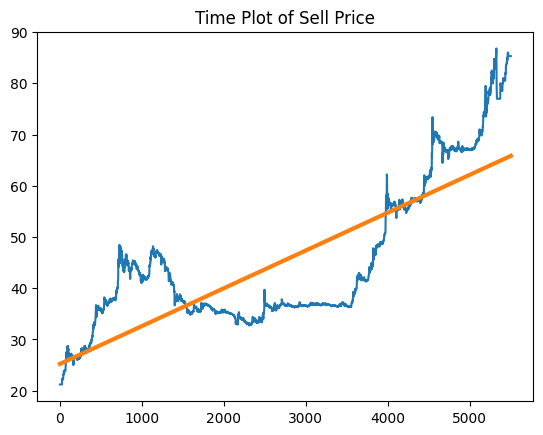

In [7]:
from sklearn.linear_model import LinearRegression
# Xác định các giá trị dự đoán
# Dữ liệu huấn luyện
X = df_clean.loc[:, ['Time']]  # đặc trưng
y = df_clean.loc[:, 'Sell Price']  # mục tiêu

# Huấn luyện mô hình
model = LinearRegression()
model.fit(X, y)

# Lưu các giá trị dự đoán dưới dạng chuỗi thời gian với cùng chỉ số thời gian như dữ liệu huấn luyện
y_pred = pd.Series(model.predict(X), index=X.index)

# Vẽ biểu đồ cho y và y dự đoán
ax = y.plot()
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Sell Price');


# Tính MAD (Mean Absolute Deviation - Độ lệch tuyệt đối trung bình)
mad = (y - y_pred).abs().mean()

# Tính SSE (Sum of Squared Errors - Tổng bình phương sai số)
sse = ((y - y_pred) ** 2).sum()

print(f"MAD (Sell Price): {mad}")
print(f"SSE (Sell Price): {sse}")
